In [1]:
cd ../../..

/hpi/fs00/home/tim.garrels/masterthesis


In [2]:
pwd

'/hpi/fs00/home/tim.garrels/masterthesis'

In [3]:
from pathlib import Path

DATASET_BASE_PATH = Path("./datasets/")
OUT_BASE_PATH = Path("./output/")

ANALYSIS_CANDIDATES = {
    "yeast": {
        "edgelist": DATASET_BASE_PATH /  "yeastInter_st.txt",
        "outpath": OUT_BASE_PATH / "yeastInter_st",
    },
}

In [4]:
CANDIDATE = "yeast"

GRAPH_EDGELIST = ANALYSIS_CANDIDATES[CANDIDATE]["edgelist"]
OUT = ANALYSIS_CANDIDATES[CANDIDATE]["outpath"]
GRAPHLET_SIZE = 4

In [5]:
# Retrieve Graphlets and their metrics
from pmotifs.PMotifGraph import PMotifGraph


g = PMotifGraph(GRAPH_EDGELIST, OUT)

In [6]:
g_p = g.load_graphlet_pos_zip(GRAPHLET_SIZE)

In [7]:
g_pm = g.load_positional_data(GRAPHLET_SIZE)

Loading Graphlet Metrics: 100%|████████████████| 16694356/16694356 [03:00<00:00, 92344.22it/s]


In [8]:
graphlet_lookup = dict(zip(g_p, g_pm.graphlet_metrics))

In [9]:
# Analysis by frequency does not make sense in local scope, all graphlet occurrences account to only one score
graphlet_frequencies = g.load_graphlet_freq_file(GRAPHLET_SIZE)
graphlet_frequencies

{'0111 1000 1000 1000': 16444931,
 '0110 1001 1000 0100': 131598,
 '0111 1010 1100 1000': 116800,
 '0111 1011 1100 1100': 772,
 '0110 1001 1001 0110': 252,
 '0111 1011 1101 1110': 3}

In [11]:
graphlet_classes = {e.graphlet_class for e in g_p}
graphlet_classes

{'0110 1001 1000 0100',
 '0110 1001 1001 0110',
 '0111 1000 1000 1000',
 '0111 1010 1100 1000',
 '0111 1011 1100 1100',
 '0111 1011 1101 1110'}

# Analysis

In [12]:
from typing import Union

from pmotifs.GraphletPositionalMetrics import GraphletPositionalMetrics


def get_pos_metric_name():
    return "degree"

def get_positional_metric(pm: GraphletPositionalMetrics) -> Union[int, float]:
    """A wrapper to consolidate metrics
    In the case of this example, motif degree does not need to be consolidated"""
    return pm["degree"]

In [13]:
def reduce_graphlet_metrics_to_class(graphlet_metrics, graphlet_class):
    return [
        (k,v)
        for k,v in graphlet_metrics.items()
        if k.graphlet_class == graphlet_class
    ]

In [14]:
def reduce_graphlet_metrics_to_pos_metric(graphlet_metrics, metric_callback):
    return [metric_callback(g_pm) for g_pm in dict(graphlet_metrics).values()]

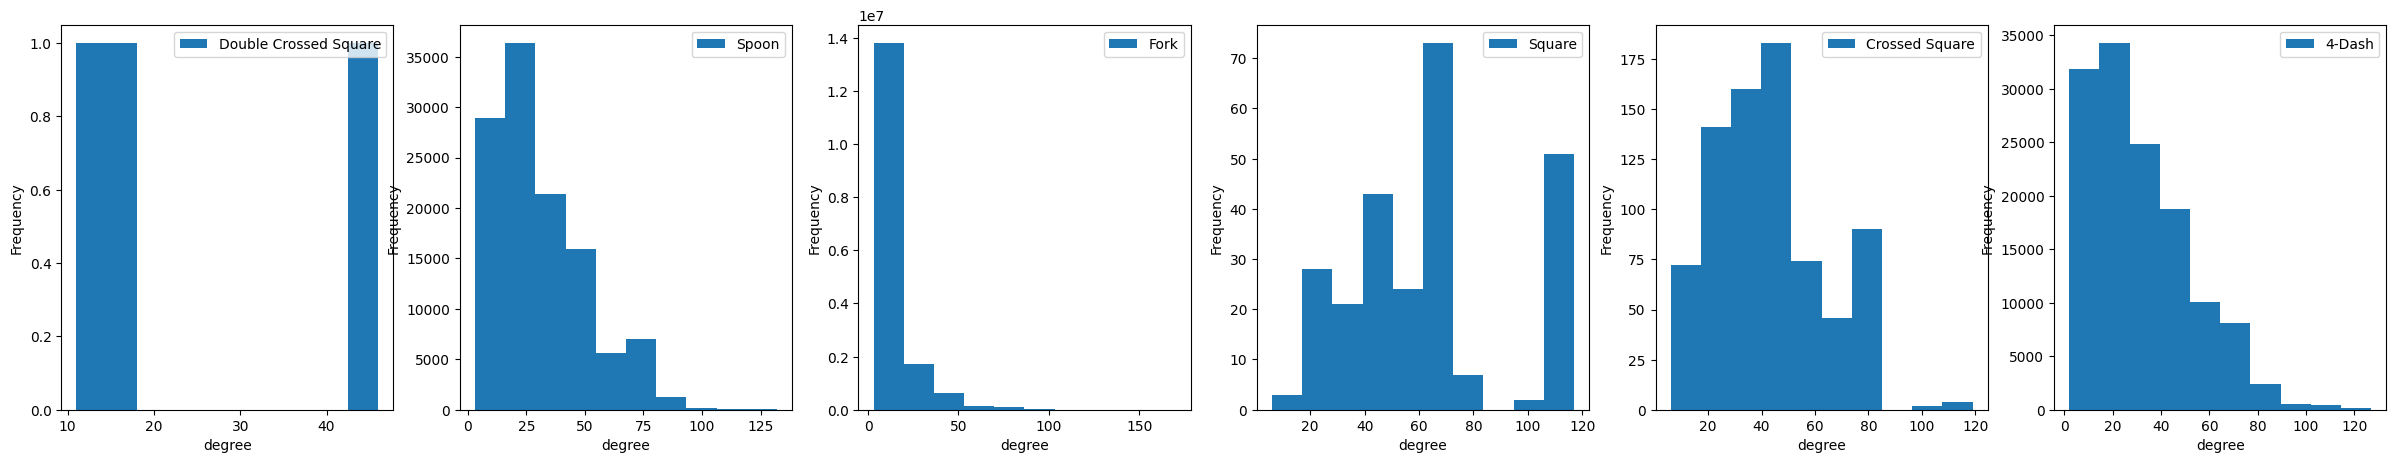

In [15]:
import matplotlib.pyplot as plt

from pmotifs.graphlet_representation import graphlet_class_to_name

fig, axes = plt.subplots(1, len(graphlet_classes), figsize=(len(graphlet_classes) * 5, 5))

for i, graphlet_class in enumerate(graphlet_classes):
    ax = axes[i]

    relevant_graphlet_occurrences = reduce_graphlet_metrics_to_class(
        graphlet_lookup,
        graphlet_class,
    )
    metric = reduce_graphlet_metrics_to_pos_metric(
        relevant_graphlet_occurrences,
        get_positional_metric,
    )
    
    # Quantiles
    
    ax.hist(metric, label=graphlet_class_to_name(graphlet_class))
    ax.legend()
    ax.set_xlabel(get_pos_metric_name())
    ax.set_ylabel("Frequency")

TODO: Which statistical tests would be appropriate here to determine the prevalency of one graphlet class over the other? Or is the plot sufficient?